In [ ]:
pip install tensorflow 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('C:\ES\IHM\MiningProcess_Flotation_Plant_Database.csv',
                 decimal=",",parse_dates=["date"], index_col="date")

# # Últimas 5 linhas do DataFrame para uma inspeção rápida dos dados.

In [3]:
df.tail()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.2,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71
2017-09-09 23:00:00,49.75,23.2,1164.12,468.019,384.801,9.61497,1.65310,300.355,292.865,298.625,...,308.115,413.754,514.143,881.323,378.969,500.100,374.354,441.182,64.27,1.71


# Resumo informativo do DataFrame, incluindo o tipo de dados de cada coluna e o uso de memória.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

In [5]:
# Checagem de valores duplicados
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

Número de linhas duplicadas: 1171


In [6]:
# Deletar linhas duplicadas
df = df.drop_duplicates()

# Checagem de valores faltantes

In [7]:
total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
% Iron Feed,0,0.0
% Silica Feed,0,0.0
Starch Flow,0,0.0
Amina Flow,0,0.0
Ore Pulp Flow,0,0.0
Ore Pulp pH,0,0.0
Ore Pulp Density,0,0.0
Flotation Column 01 Air Flow,0,0.0
Flotation Column 02 Air Flow,0,0.0
Flotation Column 03 Air Flow,0,0.0


# Checagem da continuidade temporal

In [8]:
# Remover índices duplicados
df = df[~df.index.duplicated(keep='first')]

# Função para identificar lacunas temporais
def identificar_lacunas_temporais(df, freq='H'):
    # Reindexar o DataFrame para uma sequência contínua de datas/horas
    full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=freq)
    df_reindexed = df.reindex(full_range)
    
    # Encontrar datas/horas faltantes
    missing_dates = df_reindexed[df_reindexed.isnull().any(axis=1)]
    
    return missing_dates, df_reindexed
    


In [9]:
# Identificar lacunas na série temporal
missing_dates, df_reindexed = identificar_lacunas_temporais(df)

In [10]:
# Exibir resultados
if not missing_dates.empty:
    print(f"Existem {len(missing_dates)} lacunas na série temporal:")
    print(missing_dates.index)
else:
    print("Não há lacunas na série temporal. A série é contínua.")
    

Existem 318 lacunas na série temporal:
DatetimeIndex(['2017-03-16 06:00:00', '2017-03-16 07:00:00',
               '2017-03-16 08:00:00', '2017-03-16 09:00:00',
               '2017-03-16 10:00:00', '2017-03-16 11:00:00',
               '2017-03-16 12:00:00', '2017-03-16 13:00:00',
               '2017-03-16 14:00:00', '2017-03-16 15:00:00',
               ...
               '2017-03-29 02:00:00', '2017-03-29 03:00:00',
               '2017-03-29 04:00:00', '2017-03-29 05:00:00',
               '2017-03-29 06:00:00', '2017-03-29 07:00:00',
               '2017-03-29 08:00:00', '2017-03-29 09:00:00',
               '2017-03-29 10:00:00', '2017-03-29 11:00:00'],
              dtype='datetime64[ns]', length=318, freq='H')


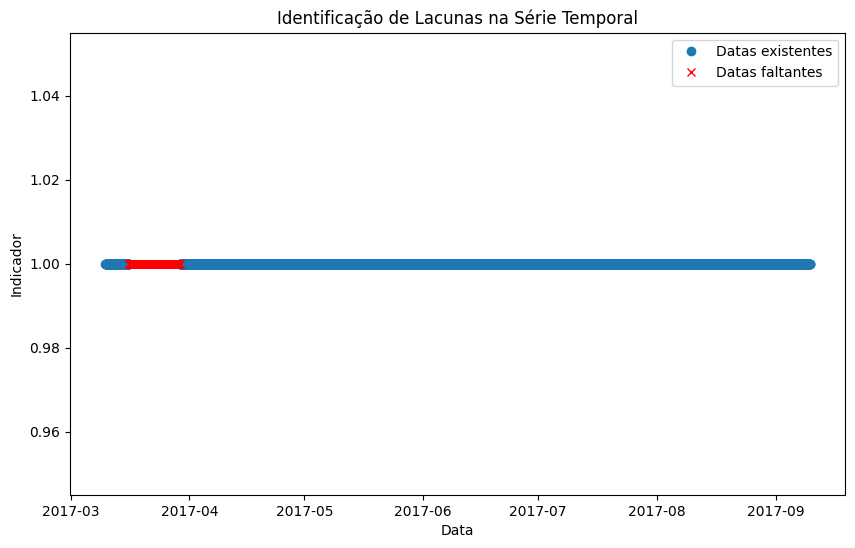

In [11]:
# Visualizar as datas/horas faltantes
if not missing_dates.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, [1] * len(df.index), 'o', label='Datas existentes')
    plt.plot(missing_dates.index, [1] * len(missing_dates.index), 'rx', label='Datas faltantes')
    plt.legend()
    plt.title('Identificação de Lacunas na Série Temporal')
    plt.xlabel('Data')
    plt.ylabel('Indicador')
    plt.show()

In [12]:
# Agrupar por dia e contar o número de atualizações diárias para a variável % Silica Concentrate
df_daily_updates = df['% Silica Concentrate'].resample('D').count()

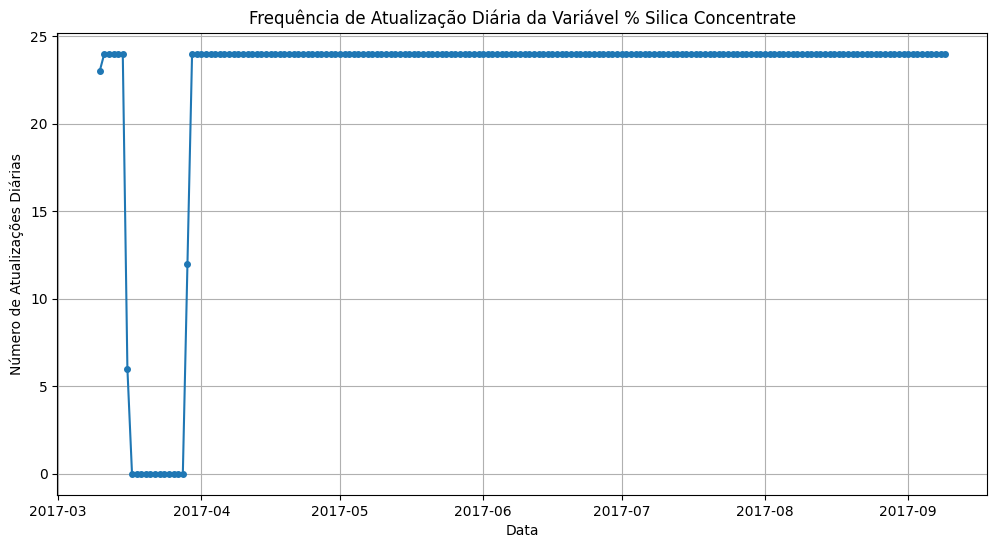

In [13]:
# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(df_daily_updates.index, df_daily_updates, marker='o', linestyle='-', markersize=4)
plt.title('Frequência de Atualização Diária da Variável % Silica Concentrate')
plt.xlabel('Data')
plt.ylabel('Número de Atualizações Diárias')
plt.grid(True)
plt.show()

In [14]:
# Neste ponto entendo que não devemos prosseguir com os modelos de séries temporais tradicionais devido aos problemas encontrados nos dados.

In [15]:
# Uma possível solução seria fazer a interpolação dos dados, entretanto essa solução poderia acarretar: 
        # Perda de Variabilidade e Padrões
        # Introdução de Viés
        # Interpretação e Confiabilidade
        # Manutenção de Dependências Temporais

In [16]:
# Para contornar o problema, decidi aplicar o modelo Naive-Bayes por ser um modelo mais simples e básico para previsão de séries temporais. 

In [17]:
# Selecionar as variáveis de entrada e alvo
target = ['% Silica Concentrate']
inputs = [
       '% Iron Feed', '% Silica Feed',
       'Starch Flow', 'Amina Flow',  'Ore Pulp Flow',
       'Ore Pulp pH', 'Ore Pulp Density', 
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 
       'Flotation Column 02 Level',    'Flotation Column 03 Level', 
       'Flotation Column 04 Level',    'Flotation Column 05 Level', 
       'Flotation Column 06 Level',    'Flotation Column 07 Level',
]

In [18]:
# Verificar quais colunas estão presentes no DataFrame
print("Colunas disponíveis no DataFrame:", df.columns)

Colunas disponíveis no DataFrame: Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [19]:
# Verificar se todas as colunas necessárias estão presentes no DataFrame
missing_columns = set(inputs + target) - set(df.columns)
if missing_columns:
    print(f"Colunas ausentes no DataFrame: {missing_columns}")

In [20]:
# Definir a data limite para treinamento e validação
split_date = pd.to_datetime('2017-08-07')

# Dividir os dados em treinamento e validação usando o índice
train_data = df[df.index < split_date]
test_data = df[df.index >= split_date]


In [21]:
# Visualização do número de registros de cada amostra
print("Treinamento e Validação:")
print(f"Treinamento: {len(train_data)} registros")
print(f"Validação: {len(test_data)} registros")

Treinamento e Validação:
Treinamento: 3281 registros
Validação: 816 registros


In [22]:
# Criar função de previsão naive
def naive_forecast(series):
    last_value = series.iloc[-1]
    return pd.Series(last_value, index=series.index)

In [23]:
# Aplicar previsão naive nos conjuntos de treinamento e validação
train_predictions = naive_forecast(train_data['% Silica Concentrate'])
test_predictions = naive_forecast(test_data['% Silica Concentrate'])

In [24]:
# Calcular métricas de erro para os conjuntos de treinamento e validação
train_mse = mean_squared_error(train_data['% Silica Concentrate'], train_predictions)
train_mae = mean_absolute_error(train_data['% Silica Concentrate'], train_predictions)

test_mse = mean_squared_error(test_data['% Silica Concentrate'], test_predictions)
test_mae = mean_absolute_error(test_data['% Silica Concentrate'], test_predictions)

print(f"Erro Quadrático Médio (MSE) - Treinamento: {train_mse:.2f}")
print(f"Erro Médio Absoluto (MAE) - Treinamento: {train_mae:.2f}")
print(f"Erro Quadrático Médio (MSE) - Validação: {test_mse:.2f}")
print(f"Erro Médio Absoluto (MAE) - Validação: {test_mae:.2f}")

Erro Quadrático Médio (MSE) - Treinamento: 1.56
Erro Médio Absoluto (MAE) - Treinamento: 0.88
Erro Quadrático Médio (MSE) - Validação: 1.68
Erro Médio Absoluto (MAE) - Validação: 0.91


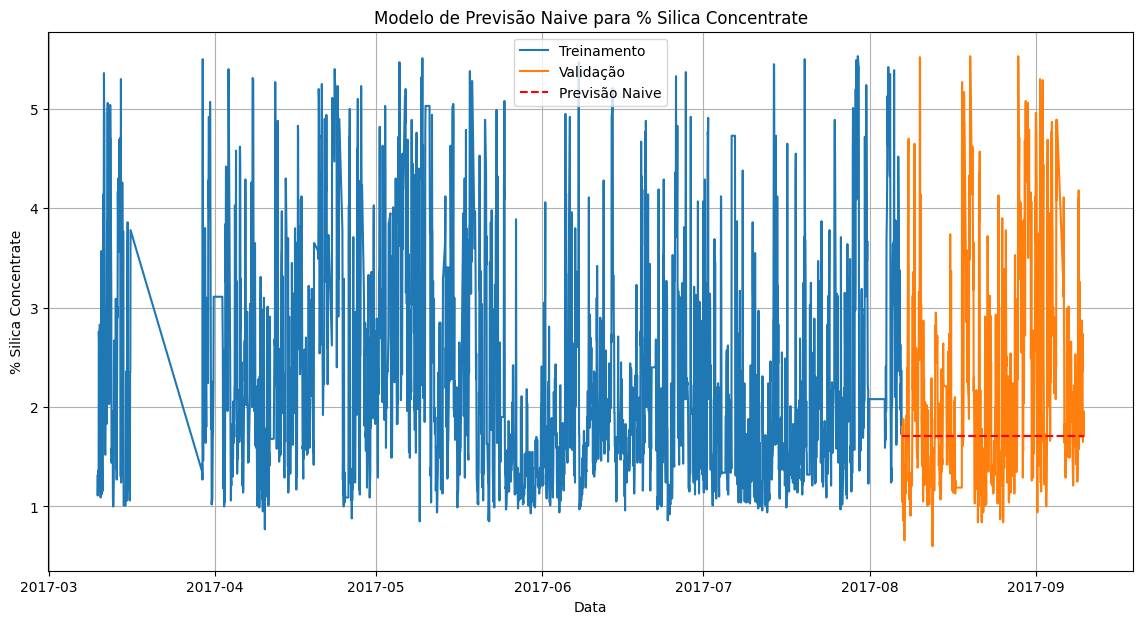

In [25]:
# Plotar resultados
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['% Silica Concentrate'], label='Treinamento')
plt.plot(test_data.index, test_data['% Silica Concentrate'], label='Validação')
plt.plot(test_predictions.index, test_predictions, label='Previsão Naive', linestyle='--', color='red')
plt.title('Modelo de Previsão Naive para % Silica Concentrate')
plt.xlabel('Data')
plt.ylabel('% Silica Concentrate')
plt.legend()
plt.grid(True)
plt.show()